In [54]:
import pandas as pd
import numpy as np

In [55]:
df=pd.read_csv('C:\\Users\\User\\Downloads\\iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [57]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [58]:
x=df.drop('species',axis=1)

In [59]:
y_=df['species']

In [60]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [62]:
y1=np.array(y_)

In [63]:
y2=y1.reshape(-1,1)

In [64]:
encoder=OneHotEncoder(sparse=False)
y=encoder.fit_transform(y2)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('xtrain:',x_train)
print('xtest:',x_test)
print('ytrain:',y_train)
print('ytest:',y_test)

xtrain:      sepal_length  sepal_width  petal_length  petal_width
4             5.0          3.6           1.4          0.2
129           7.2          3.0           5.8          1.6
82            5.8          2.7           3.9          1.2
50            7.0          3.2           4.7          1.4
97            6.2          2.9           4.3          1.3
..            ...          ...           ...          ...
28            5.2          3.4           1.4          0.2
109           7.2          3.6           6.1          2.5
55            5.7          2.8           4.5          1.3
139           6.9          3.1           5.4          2.1
39            5.1          3.4           1.5          0.2

[120 rows x 4 columns]
xtest:      sepal_length  sepal_width  petal_length  petal_width
107           7.3          2.9           6.3          1.8
91            6.1          3.0           4.6          1.4
2             4.7          3.2           1.3          0.2
118           7.7          2.6   

In [66]:
model=Sequential()
model.add(Dense(10,input_shape=(4,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [67]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
import tensorflow as tf

In [69]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir='logd/fit',histogram_freq=1)

In [70]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=tf_callbacks)

Epoch 1/50
4/4 [==============================] - 2s 457ms/step - loss: 1.4974 - accuracy: 0.3417 - val_loss: 1.5246 - val_accuracy: 0.3000
Epoch 2/50
4/4 [==============================] - 0s 107ms/step - loss: 1.4211 - accuracy: 0.3417 - val_loss: 1.4607 - val_accuracy: 0.3000
Epoch 3/50
4/4 [==============================] - 0s 96ms/step - loss: 1.3595 - accuracy: 0.3417 - val_loss: 1.4064 - val_accuracy: 0.3000
Epoch 4/50
4/4 [==============================] - 0s 102ms/step - loss: 1.3071 - accuracy: 0.3417 - val_loss: 1.3598 - val_accuracy: 0.3000
Epoch 5/50
4/4 [==============================] - 0s 82ms/step - loss: 1.2562 - accuracy: 0.3417 - val_loss: 1.3238 - val_accuracy: 0.3000
Epoch 6/50
4/4 [==============================] - 1s 208ms/step - loss: 1.2186 - accuracy: 0.3417 - val_loss: 1.2954 - val_accuracy: 0.3000
Epoch 7/50
4/4 [==============================] - 0s 101ms/step - loss: 1.1860 - accuracy: 0.3417 - val_loss: 1.2716 - val_accuracy: 0.3000
Epoch 8/50
4/4 [======

In [71]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [72]:
 %reload_ext tensorboard

In [73]:
tensorboard --logdir log/fit

Reusing TensorBoard on port 6006 (pid 17744), started 0:06:17 ago. (Use '!kill 17744' to kill it.)

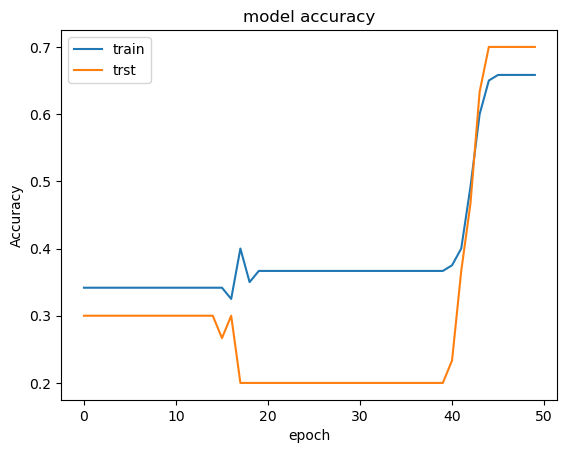

In [74]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','trst'],loc='upper left')
plt.show()

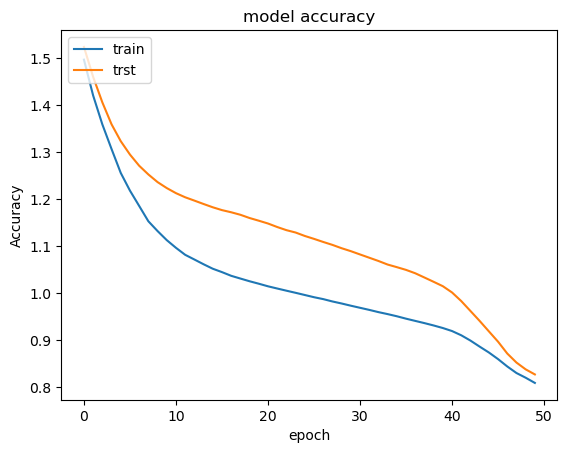

In [75]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','trst'],loc='upper left')
plt.show()